In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random
import math

In [2]:
#Preparing data for regression analysis

confirmed_cases=pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
dates=confirmed_cases.keys()
confirmed_cases=confirmed_cases.loc[:, dates[4]:dates[-1]]
dates=confirmed_cases.keys()
confirmed=[]
days=[]
j=1
for i in dates:
    confirmed.append(confirmed_cases[i].sum())
    days.append(j)
    j=j+1
print(confirmed)
print(days)

[555, 653, 941, 1434, 2118, 2927, 5578, 6166, 8234, 9927, 12038, 16787, 19881, 23892, 27635, 30817, 34391, 37120, 40150, 42762, 44802, 45221, 60368, 66885, 69030, 71224, 73258, 75136, 75639, 76197, 76823, 78579, 78965, 79568, 80413, 81395, 82754, 84120, 86011, 88369, 90306, 92840, 95120, 97882, 101784, 105821, 109795, 113561, 118592, 125865, 128343, 145193, 156094, 167446, 181527, 197142, 214910, 242708, 272166]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


[   555    653    941   1434   2118   2927   5578   6166   8234   9927
  12038  16787  19881  23892  27635  30817  34391  37120  40150  42762
  44802  45221  60368  66885  69030  71224  73258  75136  75639  76197
  76823  78579  78965  79568  80413  81395  82754  84120  86011  88369
  90306  92840  95120  97882 101784 105821 109795 113561 118592 125865
 128343 145193 156094 167446 181527 197142 214910 242708 272166]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59]


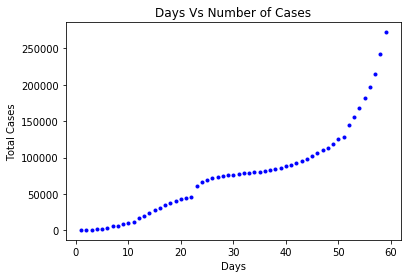

[6.318968113746434, 6.481577129276431, 6.846943139585379, 7.2682230211595655, 7.658227526161352, 7.9817332866918855, 8.626585568187433, 8.726805608446096, 9.01602720232985, 9.203013596589722, 9.395823592107716, 9.728360056322414, 9.897519780756337, 10.081298953852196, 10.226838364267364, 10.335821764746314, 10.445550181223961, 10.521911186900137, 10.600377719374908, 10.663405136729926, 10.710008060263757, 10.71931685969625, 11.00821444220409, 11.110730005729687, 11.142296471697522, 11.173585119253508, 11.201742735932854, 11.227055083747713, 11.233727302166757, 11.241077370820976, 11.249259353467496, 11.271859767147028, 11.276759995304156, 11.28436728095452, 11.294931133638677, 11.30706912504261, 11.323627630439628, 11.339999629816637, 11.36223047403299, 11.389276508390537, 11.410959182380418, 11.438632860388374, 11.462894531364663, 11.491517950531343, 11.530608199822536, 11.569504266422921, 11.606370269680092, 11.640095416465712, 11.683444309645031, 11.742965182972279, 11.7624616464403

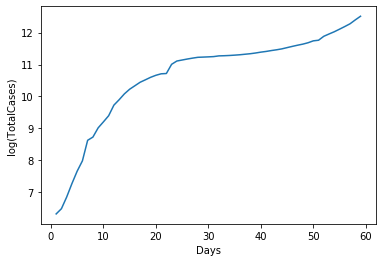

In [3]:
confirmed=np.array(confirmed)
days=np.array(days)

print(confirmed)
print(days)
plt.xlabel("Days")
plt.ylabel("Total Cases")
plt.title("Days Vs Number of Cases")
plt.plot(days, confirmed, 'b.')
plt.show()

logConfirmed=[math.log(i) for i in confirmed]
print(logConfirmed)

plt.xlabel("Days")
plt.ylabel("log(TotalCases)")
plt.plot(days, logConfirmed)
plt.show()

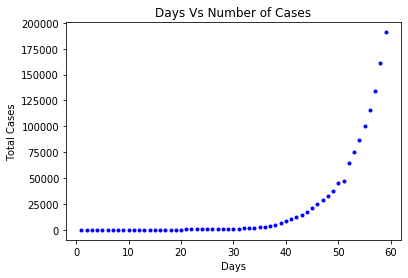

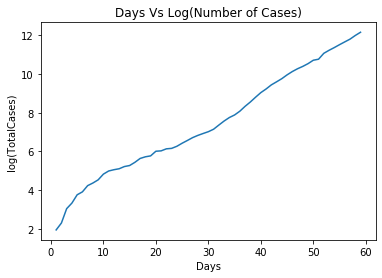

In [4]:
confirmed_cases=pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
confirmed_cases=confirmed_cases[confirmed_cases['Country/Region']!='China']
dates=confirmed_cases.keys()
confirmed_cases=confirmed_cases.loc[:, dates[4]:dates[-1]]
dates=confirmed_cases.keys()
confirmed=[]
days=[]
j=1
for i in dates:
    confirmed.append(confirmed_cases[i].sum())
    days.append(j)
    j=j+1

confirmed=np.array(confirmed)
days=np.array(days)

plt.xlabel("Days")
plt.ylabel("Total Cases")
plt.title("Days Vs Number of Cases")
plt.plot(days, confirmed, 'b.')
plt.show()

logConfirmed=[math.log(i) for i in confirmed]

plt.xlabel("Days")
plt.ylabel("log(TotalCases)")
plt.title("Days Vs Log(Number of Cases)")
plt.plot(days, logConfirmed)
plt.show()

In [5]:
logConfirmed=np.array(logConfirmed)

In [6]:
from sklearn.linear_model import LinearRegression

x_train=days[:, np.newaxis]
y_train=logConfirmed[:, np.newaxis]
print(x_train.shape)
print(y_train.shape)

myModel=LinearRegression()
myModel.fit(x_train, y_train)

x_test=x_train
y_test=myModel.predict(x_test)

(59, 1)
(59, 1)


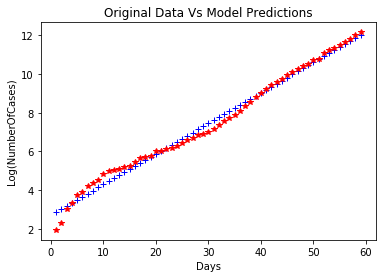

In [7]:
plt.xlabel("Days")
plt.ylabel("Log(NumberOfCases)")
plt.title("Original Data Vs Model Predictions")

plt.plot(x_test, y_test, 'b+')
plt.plot(x_train, y_train, 'r*')

plt.show()

In [8]:
y_confirmed_test=[]
for i in y_test:
    y_confirmed_test.append(math.pow(math.e, i))

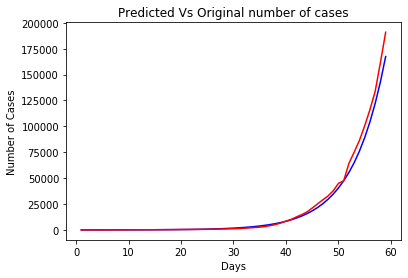

In [9]:
x_confirmed_test=days

plt.title("Predicted Vs Original number of cases")
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.plot(x_confirmed_test, y_confirmed_test, 'b-')
plt.plot(days, confirmed, 'r-')

plt.show()

In [10]:
x_pred=np.arange(len(x_test)+14)[:, np.newaxis]
y_pred_log=myModel.predict(x_pred)

y_pred=[]
for i in y_pred_log:
    y_pred.append(math.pow(math.e, i))

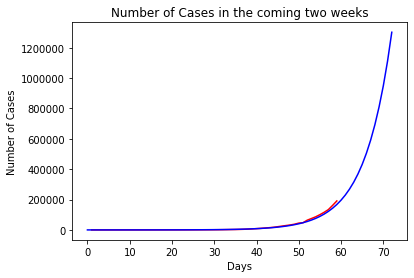

In [11]:
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.title("Number of Cases in the coming two weeks")
plt.plot(days, confirmed, 'r-')
plt.plot(x_pred, y_pred, 'b-')
plt.show()

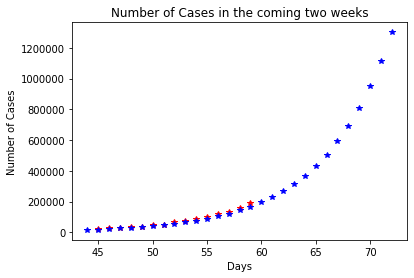

In [12]:
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.title("Number of Cases in the coming two weeks")
plt.plot(days[-15:], confirmed[-15:], 'r*')
plt.plot(x_pred[-(15+14):], y_pred[-(15+14):], 'b*')
plt.show()

In [13]:
confirmed_cases=pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
confirmed_cases=confirmed_cases[confirmed_cases['Country/Region']=='India']
dates=confirmed_cases.keys()
confirmed_cases=confirmed_cases.loc[:, dates[46]:dates[-1]]
dates=confirmed_cases.keys()

In [14]:
total_India=[]
days=[]

j=1
for i in dates:
    total_India.append(confirmed_cases[i].sum())
    days.append(j)
    j=j+1
    
total_India

[28, 30, 31, 34, 39, 43, 56, 62, 73, 82, 102, 113, 119, 142, 156, 194, 244]

In [15]:
type(total_India)

list

In [16]:
total_India=np.array(total_India)
days=np.array(days)

log_total_India=[math.log(i) for i in total_India]

print(log_total_India)

[3.332204510175204, 3.4011973816621555, 3.4339872044851463, 3.5263605246161616, 3.6635616461296463, 3.7612001156935624, 4.02535169073515, 4.127134385045092, 4.290459441148391, 4.406719247264253, 4.624972813284271, 4.727387818712341, 4.77912349311153, 4.955827057601261, 5.049856007249537, 5.267858159063328, 5.497168225293202]


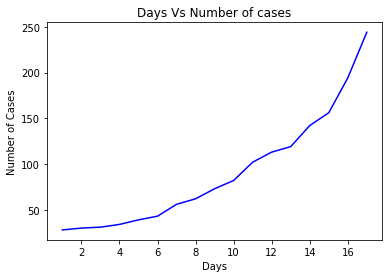

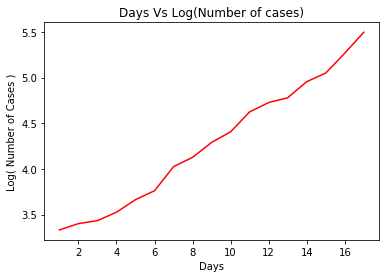

In [17]:
plt.title("Days Vs Number of cases")
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.plot(days, total_India, 'b-')
plt.show()

plt.title("Days Vs Log(Number of cases)")
plt.xlabel("Days")
plt.ylabel("Log( Number of Cases )")
plt.plot(days, log_total_India, 'r-')
plt.show()

log_total_India=np.array(log_total_India)

In [18]:
x_train_india=days[:, np.newaxis]
y_train_india=log_total_India[:, np.newaxis]

myModelIndia=LinearRegression()
myModelIndia.fit(x_train_india, y_train_india)

x_test_india=x_train_india
y_test_india=myModelIndia.predict(x_test_india)

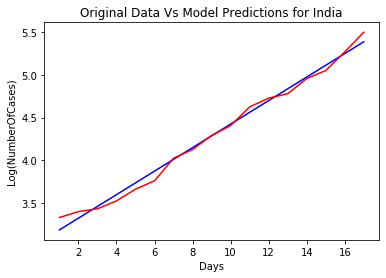

In [19]:
plt.xlabel("Days")
plt.ylabel("Log(NumberOfCases)")
plt.title("Original Data Vs Model Predictions for India")

plt.plot(x_test_india, y_test_india, 'b-')
plt.plot(x_train_india, y_train_india, 'r-')

plt.show()

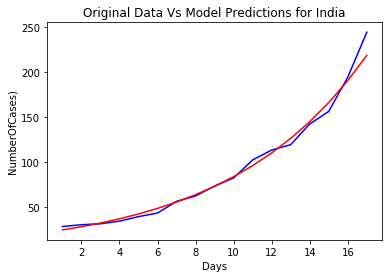

In [20]:
y_confirmed_test_india=[]
for i in y_test_india:
    y_confirmed_test_india.append(math.pow(math.e, i))
    
plt.xlabel("Days")
plt.ylabel("NumberOfCases)")
plt.title("Original Data Vs Model Predictions for India")

plt.plot(x_test_india, total_India, 'b-')
plt.plot(x_train_india, y_confirmed_test_india, 'r-')

plt.show()

In [21]:
x_pred_india=np.arange(len(x_test_india)+14)[:, np.newaxis]
y_pred_log_india=myModelIndia.predict(x_pred_india)

y_pred_india=[]
for i in y_pred_log_india:
    y_pred_india.append(math.pow(math.e, i))

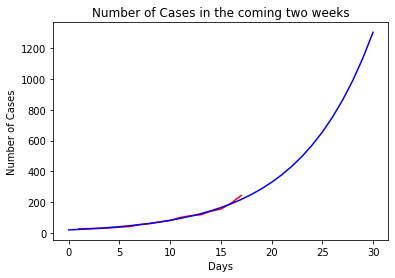

In [22]:
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.title("Number of Cases in the coming two weeks")
plt.plot(x_test_india, total_India, 'r-')
plt.plot(x_pred_india, y_pred_india, 'b-')
plt.show()

In [23]:
x_pred_india=np.arange(len(x_test_india)+14)[:, np.newaxis]
y_pred_log_india=myModel.predict(x_pred_india)

y_pred_india=[]
for i in y_pred_log_india:
    y_pred_india.append(math.pow(math.e, i))

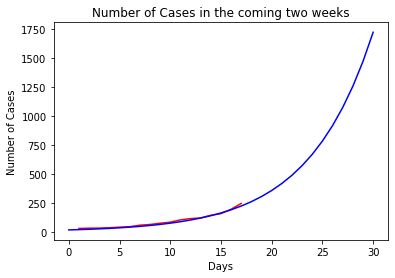

In [25]:
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.title("Number of Cases in the coming two weeks")
plt.plot(x_test_india, total_India, 'r-')
plt.plot(x_pred_india, y_pred_india, 'b-')
plt.show()

In [29]:
print(myModel.coef_)
print(myModelIndia.coef_)
print(myModel.intercept_)
print(myModelIndia.intercept_)

[[0.15778209]]
[[0.13742284]]
[2.71908414]
[3.04968679]
